## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
metadata_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
metadata_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_number = metadata_complete['Mouse ID'].unique()
total_mouse_number = len(mouse_number)
total_mouse_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_dupes = metadata_complete[metadata_complete.duplicated(["Mouse ID","Timepoint"])]
mice_dupes = pd.DataFrame({"Mouse ID":mice_dupes["Mouse ID"].unique()})
mice_dupes


,Mouse ID
0,g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dupe_df = metadata_complete.loc[metadata_complete["Mouse ID"]==str(mice_dupes.iloc[0,0]),:]
mice_dupe_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = metadata_complete.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mouse_number = clean_df['Mouse ID'].unique()
new_total_mouse_number = len(new_mouse_number)
new_total_mouse_number

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

summary_df = clean_df.groupby('Drug Regimen')
tumour_mean = summary_df['Tumour Volume (mm3)'].mean()
tumour_mean 
tumour_median = summary_df['Tumour Volume (mm3)'].median()
tumour_median 
tumour_var = summary_df['Tumour Volume (mm3)'].var()
tumour_var
std_dev = summary_df['Tumour Volume (mm3)'].std()
std_dev
sem = summary_df['Tumour Volume (mm3)'].sem()
sem

tumour_volume_df = pd.DataFrame({'Mean': tumour_mean, 'Median': tumour_mean , 'Variance': tumour_var, 
                                 'Standard Deviation': std_dev, 'SEM': sem})
                                   

tumour_volume_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.393463,52.393463,43.138803,6.568014,0.525862
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df.agg({'Tumour Volume (mm3)': ["mean", "median", "var", "std", "sem"]})



Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Timepoints for Each Treatment Regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Timepoints'>

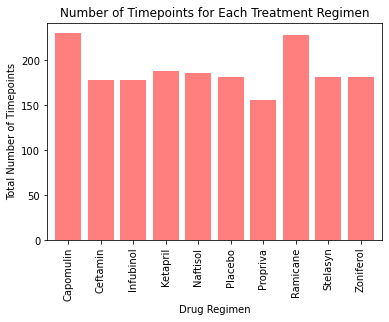

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_test = clean_df.groupby(['Drug Regimen']).count()["Timepoint"]
bar_plot = bar_test.plot.bar(color='r', alpha=0.5, width =0.8, align="center")

bar_plot.set_title("Number of Timepoints for Each Treatment Regimen")
bar_plot.set_ylabel("Total Number of Timepoints")
bar_plot


([<matplotlib.axis.XTick at 0x11ed97e1460>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

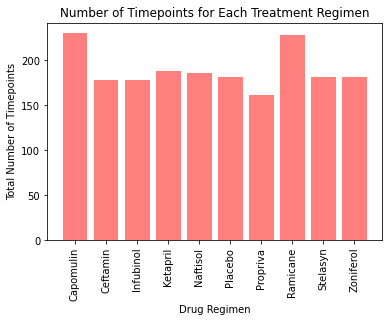

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.title("Number of Timepoints for Each Treatment Regimen")
plt.xticks(rotation=90)

mouse_id = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.bar(x_axis, mouse_id, color = "red", alpha = 0.5, align = "center", width = 0.8)

tick_locations = [value for value in x_axis]

drug_regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 
                "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

plt.xticks(tick_locations, drug_regimen, rotation = 90)

<AxesSubplot:title={'center':'Distribution of Male vs Female mice'}>

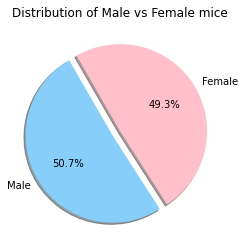

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df["Sex"].value_counts()

pie_plot = gender.plot.pie(explode = (0.1, 0), autopct= "%1.1f%%",colors = ["lightskyblue", "pink"], title='Distribution of Male vs Female mice',
                           shadow=True, startangle=120)
pie_plot.set_ylabel('')
pie_plot


(-1.200491365503176,
 1.1394626143523308,
 -1.1647514740147882,
 1.138186537232429)

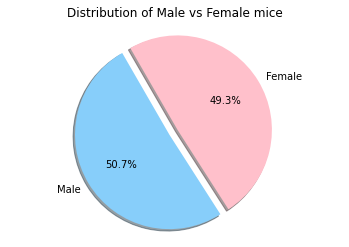

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = [ 'Male','Female']

sizes = [50.7415254237, 49.2584745763]

colours = [ "lightskyblue","pink",]

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colours, autopct="%1.1f%%", shadow=True, startangle=120)

plt.title("Distribution of Male vs Female mice")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Merge max timepoint onto data_df






In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumour vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0, 0.5, ' Tumour volume (mm3)')

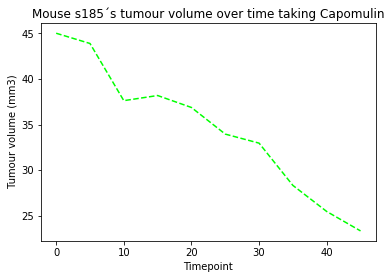

In [14]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

#cap_mice
capomulin_mice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_mice.value_counts("Mouse ID")

#Mouse_s185
Mouse_s185 = clean_df.loc[clean_df["Mouse ID"] == "s185"]


tumour_y = Mouse_s185["Tumour Volume (mm3)"]
time_x = Mouse_s185["Timepoint"]
plt.plot(time_x, tumour_y, color="lime", label="Tumour volume", linestyle = "dashed")

plt.title( "Mouse s185´s tumour volume over time taking Capomulin")
plt.xlabel("Timepoint")
plt.xticks(np.arange(min(time_x), max(time_x)+1, 10))
plt.ylabel(" Tumour volume (mm3)")

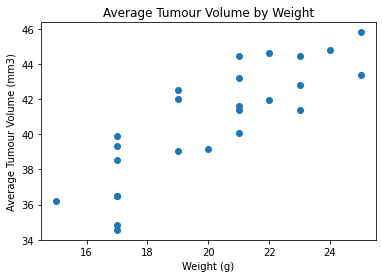

In [15]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumour Volume (mm3)']
                          .mean().sort_values()).reset_index().rename(columns={'Tumour Volume (mm3)': 'avg_tumour_vol'})

avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumour_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumour_vol']

plt.scatter(x, y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.title('Average Tumour Volume by Weight')

plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


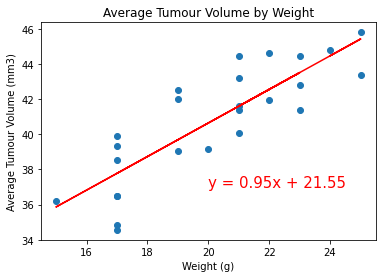

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumour Volume (mm3)']
                          .mean().sort_values()).reset_index().rename(columns={'Tumour Volume (mm3)': 'avg_tumour_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumour_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumour_vol']
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.title('Average Tumour Volume by Weight')

correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(20,37),fontsize=15,color="red")


plt.scatter(x,y)
plt.plot(x,regress_values,"r-")


plt.show()